# Week4 - Homework 2

- Execute the below code, then answer the numbered questions.
- You can create additinal code and markdown blocks

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/car-reg-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9055 entries, 0 to 9054
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8164 non-null   object 
 1   transmission   8106 non-null   object 
 2   state          8152 non-null   object 
 3   condition      8173 non-null   float64
 4   odometer       8178 non-null   float64
 5   auction_value  8107 non-null   float64
 6   selling_price  9055 non-null   float64
dtypes: float64(4), object(3)
memory usage: 495.3+ KB


In [3]:
df

,make,transmission,state,condition,odometer,auction_value,selling_price
0,nissan,automatic,md,4.8,NaN,14350.0,13600.0
1,ford,automatic,mo,3.7,29398.0,17600.0,17100.0
2,ford,automatic,fl,3.2,32180.0,19100.0,17600.0
3,nissan,automatic,ca,NaN,30798.0,11950.0,10700.0
4,ford,automatic,nj,2.8,29526.0,28000.0,26100.0
...,...,...,...,...,...,...,...
9050,NaN,automatic,il,4.2,41186.0,NaN,11600.0
9051,ford,automatic,fl,NaN,38810.0,16250.0,17300.0
9052,nissan,NaN,ga,4.7,4551.0,12500.0,13800.0
9053,ford,automatic,il,4.6,33114.0,21800.0,27000.0


In [4]:
df.isnull().sum() / df.shape[0] * 100

make              9.839867
transmission     10.480398
state             9.972391
condition         9.740475
odometer          9.685257
auction_value    10.469354
selling_price     0.000000
dtype: float64

It looks like there are some null values in some columns. It will be up to us to decide on whether to drop those rows or impute them.

## Question 1:
### Which features can we use?

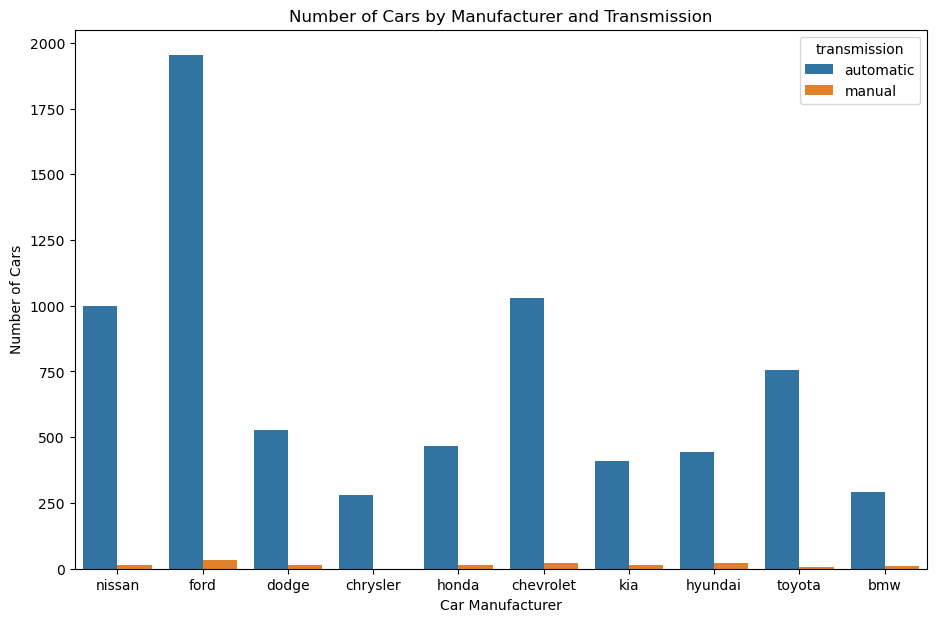

In [5]:
plt.figure(figsize=(11, 7))
sns.countplot(x='make', hue='transmission', data=df)
plt.xlabel("Car Manufacturer")
plt.ylabel("Number of Cars")
plt.title("Number of Cars by Manufacturer and Transmission")
plt.show()

Interesting. There are a lot of ford cars. Similarly, car manufactures that produce more luxurious cars have much lesser count. We should definately be able to use this feature.
There are a lot less manual cars accross the board as compared to the automatica cars. These two features will be useful.

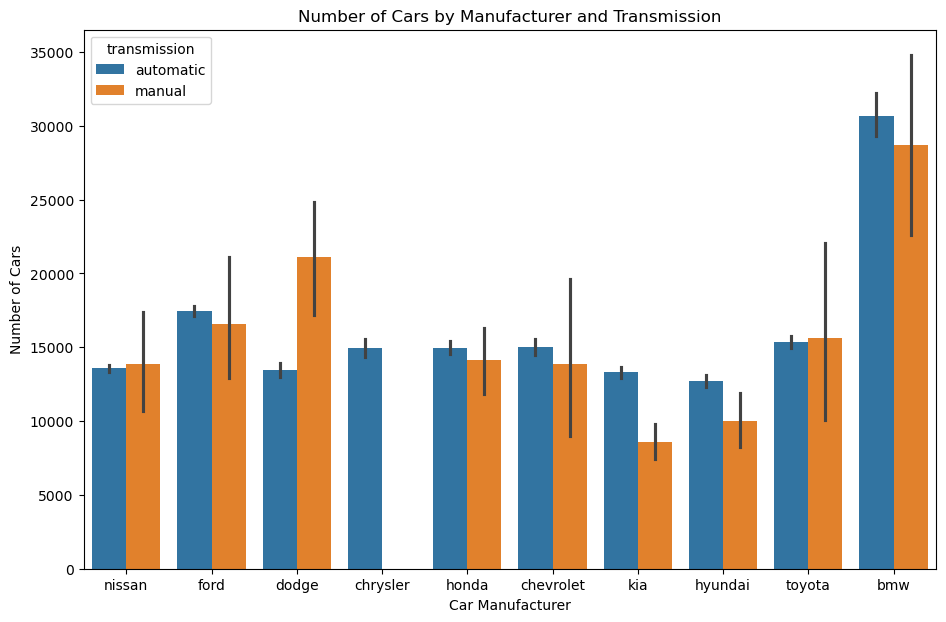

In [6]:
plt.figure(figsize=(11, 7))
sns.barplot(x='make', hue='transmission', y = "selling_price", data=df)
plt.xlabel("Car Manufacturer")
plt.ylabel("Number of Cars")
plt.title("Number of Cars by Manufacturer and Transmission")
plt.show()

Also, when we look here, regardless of the transmission, cars like bmw are much more expensive. This info will definaely be more useful.

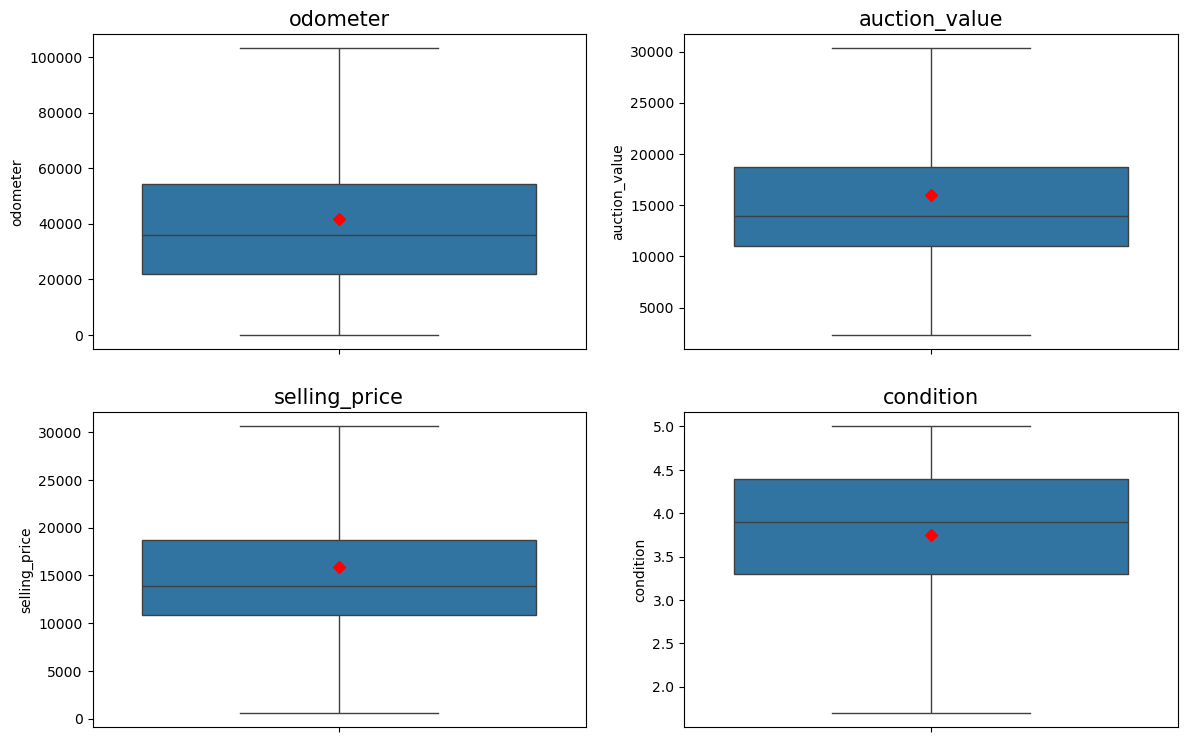

In [7]:
plt.figure(figsize=(14, 9))

# these are the columns used for boxplotting
boxplot_cols = ['odometer', 'auction_value', 'selling_price', 'condition']

for i, column in enumerate(boxplot_cols, 1):
    plt.subplot(2, 2, i) # 2 row 2 column subplot
    sns.boxplot(y=column, data=df, showfliers=False, meanprops={"marker": "D", "markerfacecolor": "red", "markeredgecolor": "red"}, showmeans=True) # exclude outliers and show mean
    plt.title(f'{column}', fontsize=15)
plt.show()

Well, all of the numerical columns are skewed. However, the degree of skewness is pretty small. 

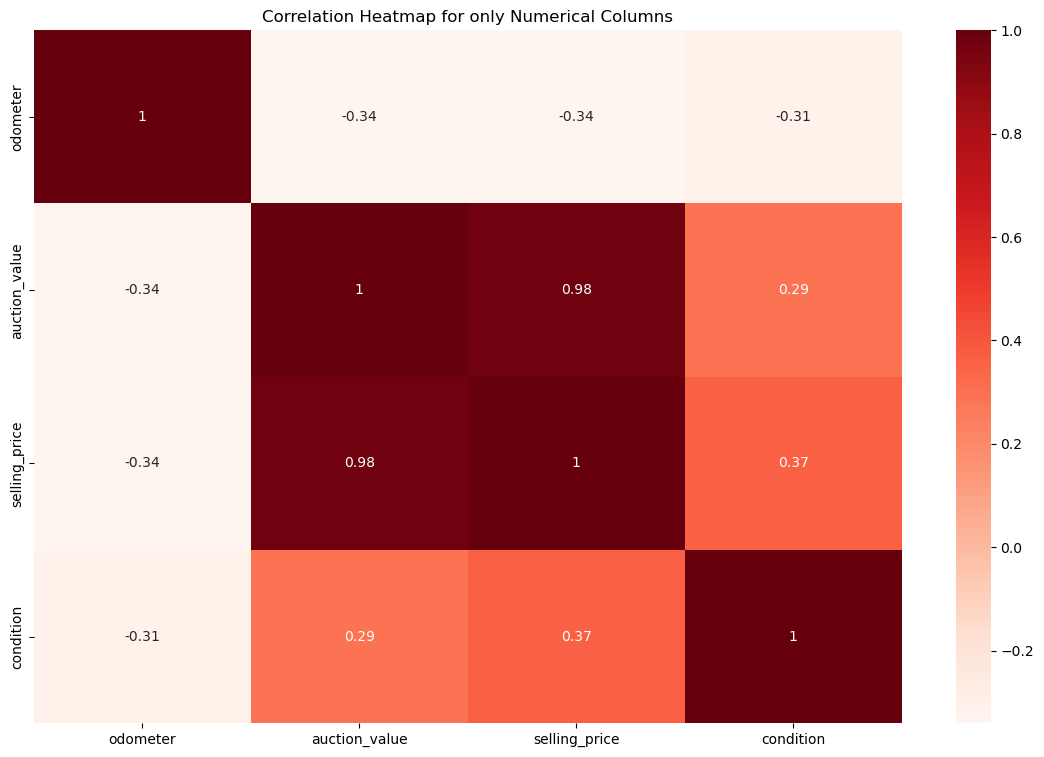

In [8]:
plt.figure(figsize=(14, 9))
# only use numerical cilumns here
corr = df[boxplot_cols].corr()
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title('Correlation Heatmap for only Numerical Columns')
plt.show()

<b> Interesting. The numerical columns seem to have strong linear relationships.There also seems to be collinearity between columns. We don't really care about this in ML as we are not really focusing on feature importances.

In [9]:
df1 = df.dropna()

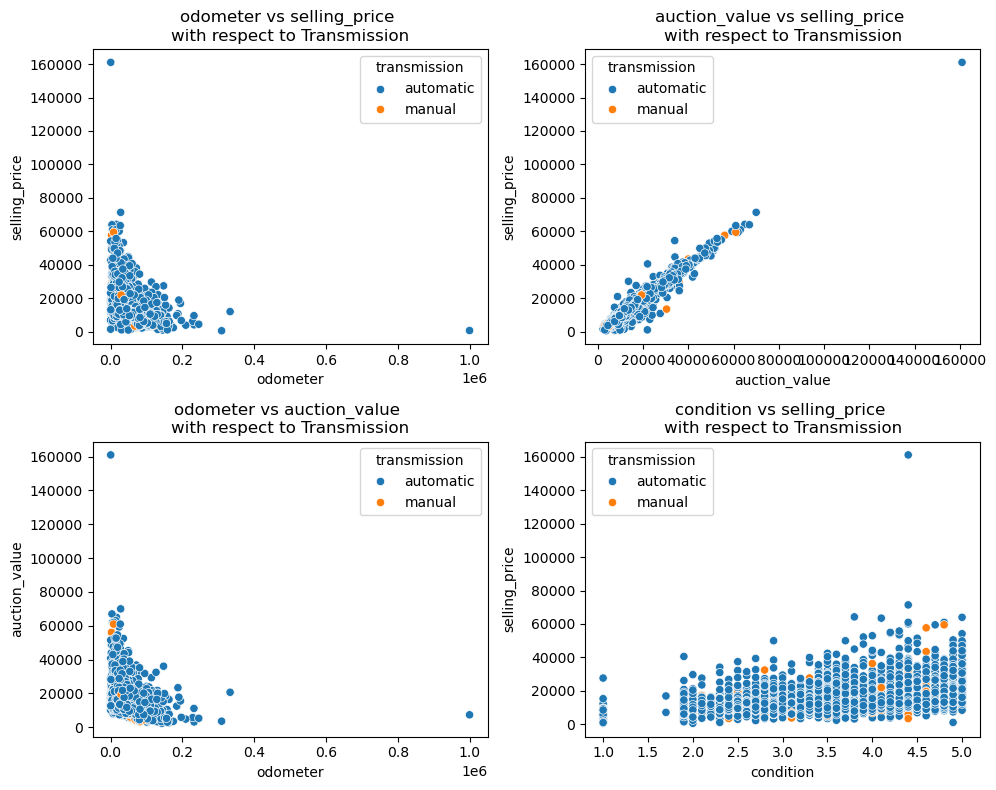

In [10]:
plt.figure(figsize=(10, 8))

# these are the scatterplot pairs to be plotted with hue = transmission
scatterplot_pairs = [('odometer', 'selling_price'), ('auction_value', 'selling_price'), ('odometer', 'auction_value'), ('condition', 'selling_price')]

for i, (x_col, y_col) in enumerate(scatterplot_pairs, 1):
    plt.subplot(2, 2, i)  # 2 row 2 column subplot
    sns.scatterplot(data=df1, x=x_col, y=y_col, hue='transmission')
    plt.title(f'{x_col} vs {y_col} \nwith respect to Transmission')

plt.tight_layout()
plt.show()

If we look here, the higher the auction price, the higher the selling price, which is kind of common sense. Given that there are very few manual cars, it is difficult to do the differentiation based on its type. The better the condition, the selling price is higher. All of these features look useful.

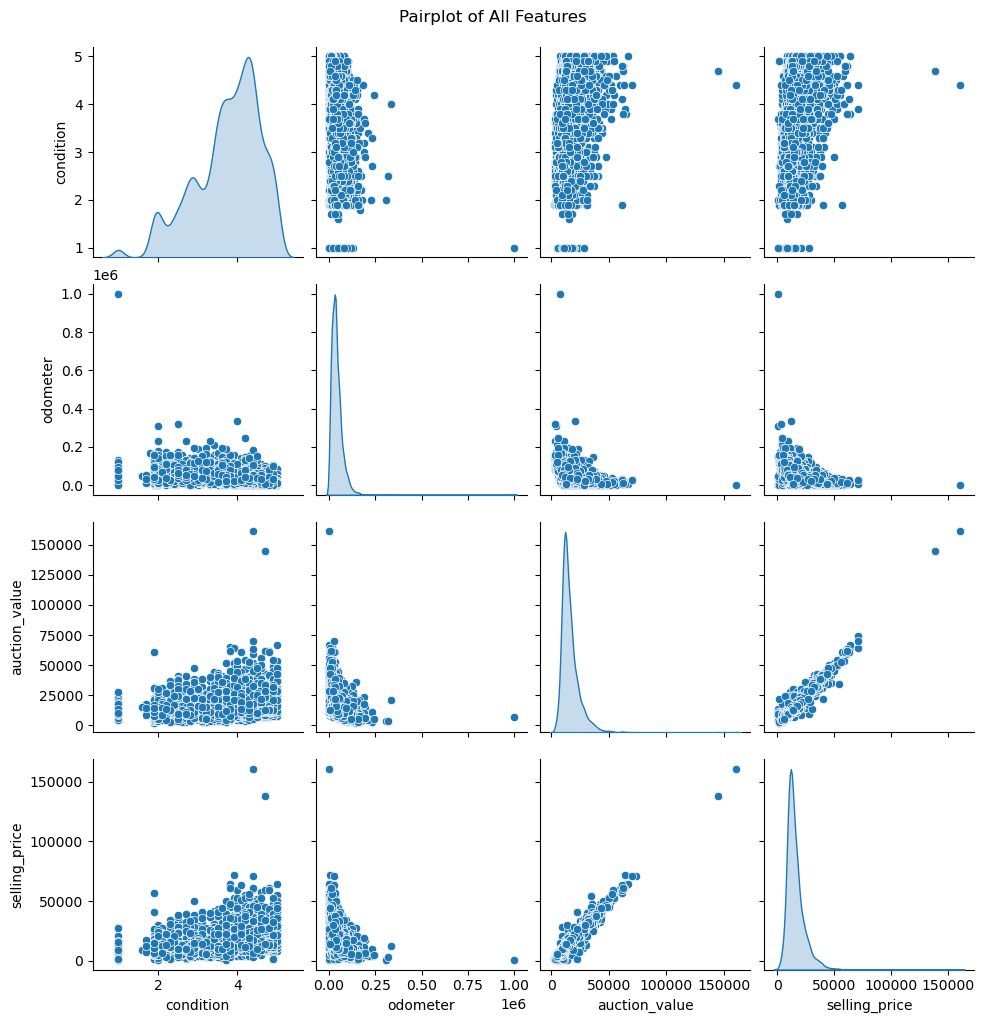

In [11]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pairplot of All Features', y=1.02)
plt.show()


The distribution of numerical columns look skewed. This will surely make modelling with linear regression tougher.

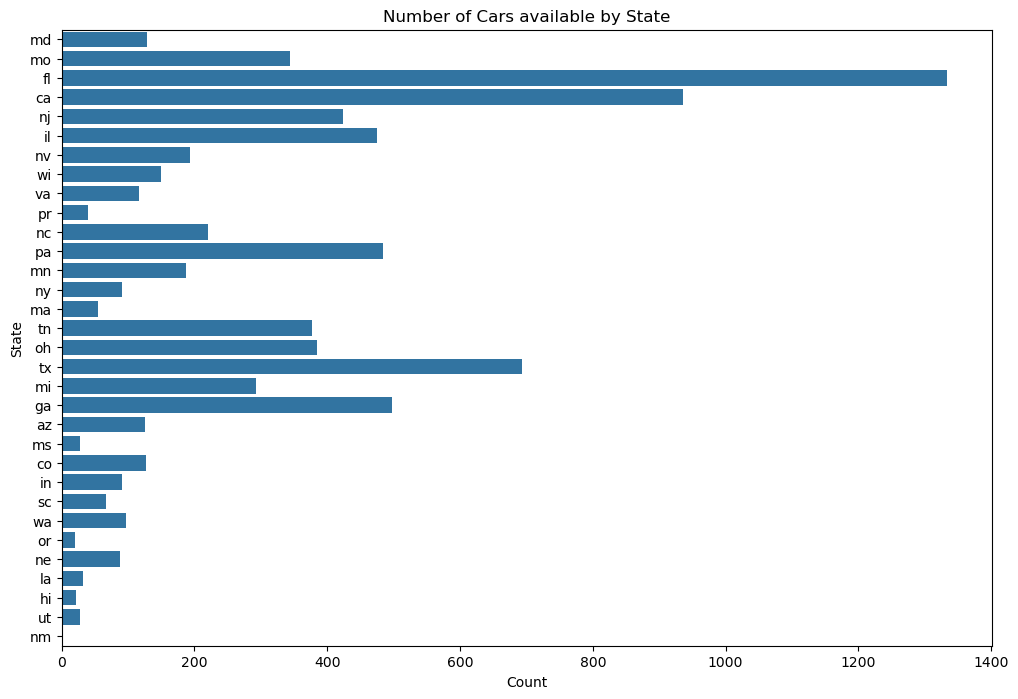

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(y='state', data=df)
plt.ylabel("State")
plt.xlabel("Count")
plt.title("Number of Cars available by State")
plt.show()

The state column does not look helpful. It simply gives the number of cars per state. It is unlikely to have any impact on the price of a car.

Based on the plots above, these features are useful:

1. transmission
2. make
3. auction_value
4. condition
5. odometer (midly negatively correlated with target)

In [13]:
from sklearn.model_selection import train_test_split
features = [
    'transmission', 'make', 'auction_value', 'condition', 'odometer'
]

X = df[features]
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

print(f'Records in training data: {X_train.shape[0]:,}')
print(f'Records in test data: {X_test.shape[0]:,}')
print('\nFeatures:')
print(*X_train.columns, sep='\n')

Records in training data: 7,244
Records in test data: 1,811

Features:
transmission
make
auction_value
condition
odometer


## Question 2: 
Split the features into two lists, one for the numerical features and another for the categorical features.

In [14]:
# Get numerical columns and categorical columns
numerical_features = list(X_train.select_dtypes(include='float64').columns)
categorical_features = list(X_train.select_dtypes(include='object').columns)

print("Numerical Features available:", numerical_features)
print("Categorical Features avaibale:", categorical_features)

Numerical Features available: ['auction_value', 'condition', 'odometer']
Categorical Features avaibale: ['transmission', 'make']


## Question 3: 
 Using the numerical variables, create a pipeline that replaces the missing values with the median and then standardizes the values using a standard scaler.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [16]:
# pipeline object for numerical columns that will do imputation using median and standard scaking
pipeline_for_processing_numerical_columns = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

In [17]:
# transforming numerical columns of training dataframe
transformed_numerical_train_df = pd.DataFrame(pipeline_for_processing_numerical_columns.fit_transform(X_train[numerical_features]), columns=numerical_features)
transformed_numerical_train_df

,auction_value,condition,odometer
0,-0.268271,0.812041,-0.187630
1,0.743492,0.684329,-0.479351
2,-0.740427,-1.231354,0.861689
3,-0.389683,-0.209657,-0.553430
4,-0.544820,-0.592793,-0.003804
...,...,...,...
7239,-0.558310,0.173480,0.276634
7240,0.244355,0.684329,-0.158238
7241,-0.544820,0.556616,-0.002603
7242,-0.841604,-0.337369,0.433915


## Question 4: 
Using the categorical variables, create a pipeline that replaces the missing values with the most frequent and then use one-hot encoding to convert the data to numerical arrays.
- You should be dropping one category from each variable when using the one-hot encoder.  
- To ensure the pipeline doesn't break when it receives new/unexpected categories, you should ignore new categories.
- Use a fit transformer on the training dataset to validate all the columns are now numeric and to determine how many columns the transformed data contains.

In [18]:
import numpy as np
import scipy

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

# pipeline object for categorical columns that will do imputation using most frequent and one-hot encoding
pipeline_for_processing_categorical_columns = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')), 
                                ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])


transformed_categorical_train = pipeline_for_processing_categorical_columns.fit_transform(X_train[categorical_features]).toarray()

In [20]:
transformed_categorical_train.dtype, transformed_categorical_train

(dtype('float64'),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]))

All of the columns are infact numeric. 

In [21]:
print("Total Number of new columns available: ", transformed_categorical_train.shape[1])

Total Number of new columns available:  10


## Question 5: 

Combine the numerical and categorical pipelines into one data processing pipeline.
- Use a fit transformers and the training dataset to verify the data has no missing values and the correct number of columns.

In [22]:
from sklearn.compose import ColumnTransformer

# Combine numerical and categorical into one pipeline that does both stuff
combined_preprocessor = ColumnTransformer(
    transformers=[
        ('numerical_pipe', pipeline_for_processing_numerical_columns, numerical_features),
        ('categorical_pipe', pipeline_for_processing_categorical_columns, categorical_features)
])

In [23]:
# lets fit and transform on the training data
X_train_transformed = combined_preprocessor.fit_transform(X_train)

In [24]:
print("Total number of avaialble columns: ", X_train_transformed.shape[1])
print("Number of null values: ", np.sum(np.isnan(X_train_transformed)))

Total number of avaialble columns:  13
Number of null values:  0


## Question 6: 

Add a linear regression model to the pipeline.
- Report what the $R^2$ is using the `test` data.  

In [25]:
from sklearn.linear_model import LinearRegression

# combining the columne transformer and linear regression to create final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', combined_preprocessor),
    ('regressor', LinearRegression())
])

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['auction_value', 'condition',
                                                   'odometer']),
                                                 ('categorical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['transmission', 'make'])])),
                ('regressor', LinearRegression())])

In [27]:
train_pred = pipeline.predict(X_train)
test_pred = pipeline.predict(X_test)

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [29]:
def evalute_our_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    print(f'R-squared: {r2:.3f}')
    print(f'Mean Absolute Error (MAE): {mae:.3f}')
    print(f'Mean Squared Error (MSE): {mse:.3f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

In [30]:
print("Train Results")
evalute_our_model(y_train, train_pred)

Train Results
R-squared: 0.867
Mean Absolute Error (MAE): 1516.923
Mean Squared Error (MSE): 8373565.661
Root Mean Squared Error (RMSE): 2893.711


In [31]:
print("Test Results")
evalute_our_model(y_test, test_pred)

Test Results
R-squared: 0.884
Mean Absolute Error (MAE): 1414.221
Mean Squared Error (MSE): 6959270.314
Root Mean Squared Error (RMSE): 2638.043


## Question 7: 

Create a plot(s) of the residuals. Do you have any concerns about patterns in the residuals that the model is neglecting to pick-up?
- Include a sentence or two on what you observe.

In [32]:
# these will be our residuals
residuals = y_test - test_pred

Text(0, 0.5, 'Residuals (y_test - test_pred)')

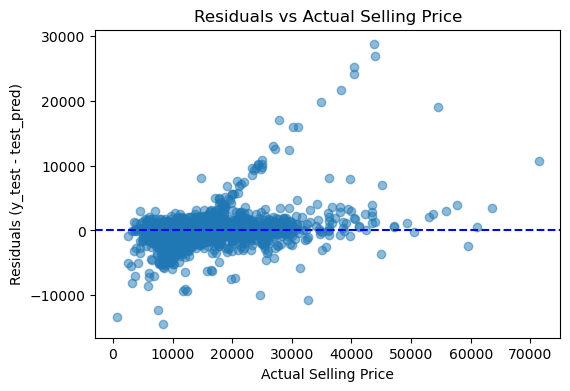

In [33]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='blue', linestyle='--')
plt.title("Residuals vs Actual Selling Price")
plt.xlabel("Actual Selling Price")
plt.ylabel("Residuals (y_test - test_pred)")

Interesting. The model is performing pretty well actually. The residuals are clustered around 0. it looks like there are few outliers where model is over/under predicting. it makes sense as when we analyzed the data, there were some outliers. These larger residuals could be attributed to outliers. If we remove them, some of these larger residuals will definately be removed. Nonetheless, the model is performing pretty well.

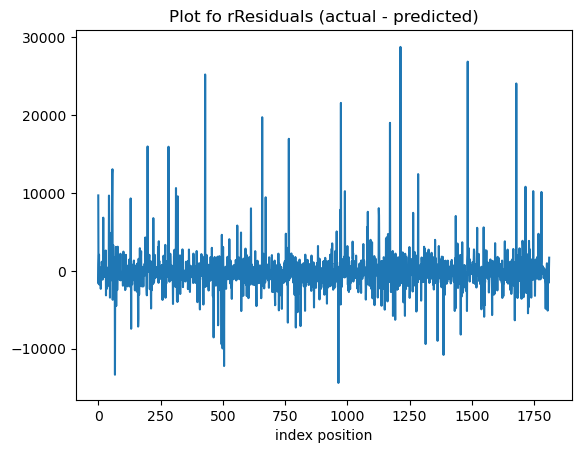

In [34]:
pd.Series(y_test-test_pred).reset_index(drop=True).plot()
plt.title("Plot fo rResiduals (actual - predicted)")
plt.xlabel("index position")
plt.show()

Interesting. Some of the samples have extremely large residuals. But, they are very fewer in number in comparision to other data points. It is likely that when these outliers are removed, our plot will be smoother.

Text(0, 0.5, 'Frequency')

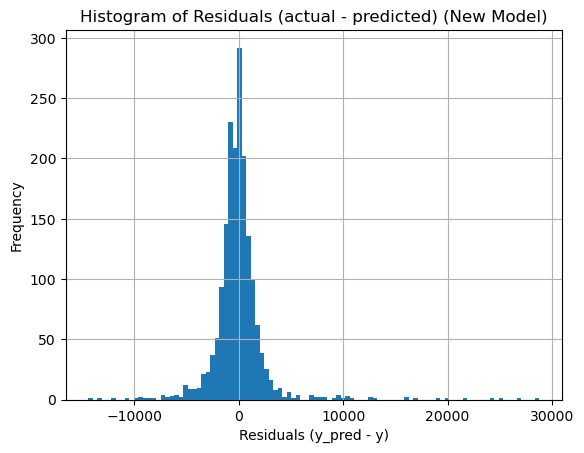

In [35]:
(y_test-test_pred).hist(bins=100)
plt.title("Histogram of Residuals (actual - predicted) (New Model)")
plt.xlabel("Residuals (y_pred - y)")
plt.ylabel("Frequency")

The same can be answered here from the histogram. Majority of predicted values have residuals closer to 0, whereas there are some residuals on both sides of the histogram (negatives and positives). Furthremore, the residuals are in bell-shaped (normal distribution). This essentially means that our model's residuals are distributed symmetrically around 0  and they are random and our model is not really biased. 

## Question 8: 

Modify the pipeline to use a ridge regression model with an alpha value of 100. How does this change the $R^2$?

In [36]:
from sklearn.linear_model import Ridge

In [37]:
# new pipeline with ridge regreession with alpha = 100
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', combined_preprocessor),
    ('regressor', Ridge(alpha=100))
])

In [38]:
ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['auction_value', 'condition',
                                                   'odometer']),
                                                 ('categorical_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['transmission', 'make'])])),
                ('regressor', Ridge(alpha=100))])

In [39]:
ridge_train_pred = ridge_pipeline.predict(X_train)
ridge_test_pred = ridge_pipeline.predict(X_test)

In [40]:
print("Train Results with Ridge Regression")
evalute_our_model(y_train, ridge_train_pred)

Train Results with Ridge Regression
R-squared: 0.866
Mean Absolute Error (MAE): 1505.060
Mean Squared Error (MSE): 8477025.864
Root Mean Squared Error (RMSE): 2911.533


In [41]:
print("Test Results with Ridge Regression")
evalute_our_model(y_test, ridge_test_pred)

Test Results with Ridge Regression
R-squared: 0.883
Mean Absolute Error (MAE): 1399.569
Mean Squared Error (MSE): 7072788.220
Root Mean Squared Error (RMSE): 2659.471


Ridge regression is a linear regression combined with L2 regularization. it adds a penalty term to loss function which is sum of squared values of the model's  coefficients. It makes model's coefficients smaller to reduce overfitting. setting value 100 would significantly shrink the coefficients. Our model was generalizing well to test data and there was no sign of overfitting. R-sqaured with ridge is reduced very slightly but the overall generalization is better in both ways.